In [115]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import lzma
import re

pd.options.display.max_colwidth = 100
pd.options.display.max_rows = 1000
#plt.style.use('ggplot')
plt.style.use('seaborn-paper')
mpl.rcParams['axes.linewidth'] = 0.7

In [167]:
def get_path(path):
    return re.search("(/[^/]+){2}$", path)[0][1:]

In [168]:
file = "latest_results.json.xz"

data = None
if file.endswith('.xz'): file = lzma.open(file, 'rt')
data = pd.read_json(file)
data = data.sort_values(['file', 'mode'])

short_paths = data['file'].map( get_path )
data.update( short_paths )

In [177]:
succeeded = data[data.status == 'ok'][['file', 'mode', 'time_viper']]

In [178]:
len(succeeded)

183

In [179]:
states = set(data.status.values)
status_colors = {}
for s in states:
    if s == 'ok':
        c = 'green'
    elif s == 'cutintro_uncompressible':
        c = 'yellow'
    elif s == 'cutintro_termset_trivial':
        c = 'gold'
    elif 'timeout' in s:
        c = plt.cm.Blues(hash(s)/2**65+0.5)
    elif s.endswith('exception'):
        c = plt.cm.Reds(hash(s)/2**65+0.5)
    else:
        c = plt.cm.Greys(hash(s)/2**65+0.5)
    status_colors[s] = c

def plot_status(d, legend=True, **kwargs):
    plt.axis('equal')
    d.plot(kind='pie', autopct='%1.1f%%',
                        colors=[status_colors[s] for s in d.index], **kwargs) \
        .set_ylabel('')
    if legend: plt.legend(d.index, loc='center left', bbox_to_anchor=(1, 0.5))

In [180]:
data.groupby('status').size()

status
ok                          183
parsing_other_exception    1036
saturated                   204
viper_timeout               749
dtype: int64

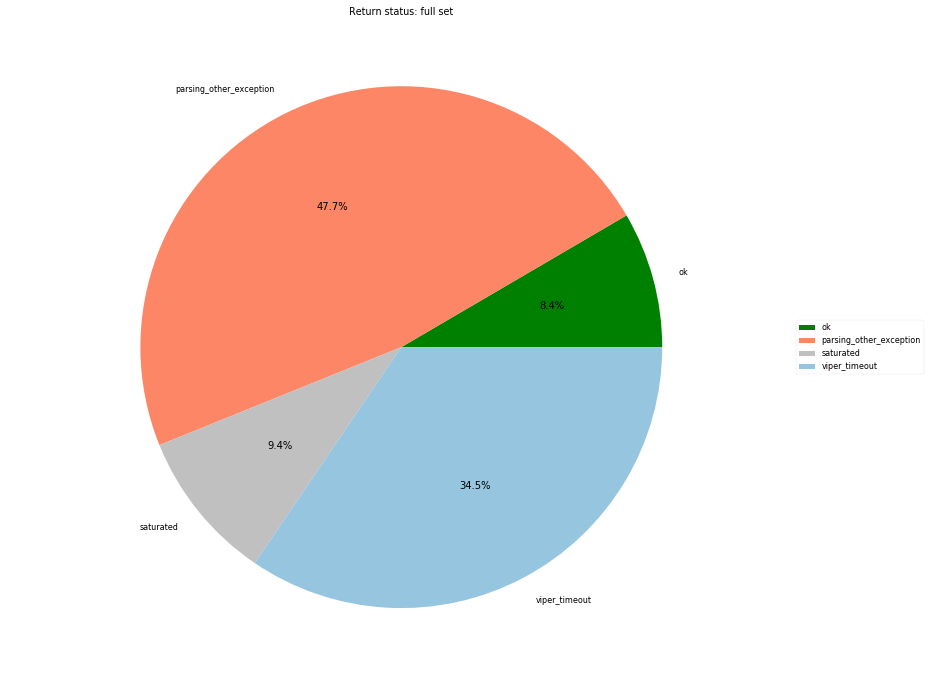

In [181]:
plot_status(data.groupby('status').size(), figsize=(14,12), title='Return status: full set')

In [182]:
succeeded.groupby('mode').size()

mode
analytic_independent    43
analytic_sequential     75
spind                   49
treegrammar             16
dtype: int64

In [183]:
independent_success = succeeded[succeeded['mode'] == 'analytic_independent']
independent_files = set(independent_success.T.loc['file'])

In [196]:
sequential_success = succeeded[succeeded['mode'] == 'analytic_sequential']
sequential_files = set(sequential_success.T.loc['file'])

In [197]:
spind_success = succeeded[succeeded['mode'] == 'spind']
spind_files = set(spind_success.T.loc['file'])

In [198]:
independent_files - spind_files

{'isaplanner/prop_07.smt2',
 'isaplanner/prop_26.smt2',
 'isaplanner/prop_29.smt2',
 'tip2015/int_mul_ident_right.smt2',
 'tip2015/list_nat_elem.smt2',
 'tip2015/list_return_2.smt2',
 'tip2015/weird_nat_add3_assoc1.smt2',
 'tip2015/weird_nat_add3_spec.smt2'}

In [199]:
spind_files - independent_files

{'isaplanner/prop_01.smt2',
 'isaplanner/prop_09.smt2',
 'isaplanner/prop_19.smt2',
 'isaplanner/prop_23.smt2',
 'isaplanner/prop_32.smt2',
 'isaplanner/prop_55.smt2',
 'isaplanner/prop_57.smt2',
 'isaplanner/prop_79.smt2',
 'isaplanner/prop_80.smt2',
 'prod/prop_15.smt2',
 'tip2015/nat_alt_mul_comm.smt2',
 'tip2015/nat_alt_mul_same.smt2',
 'tip2015/nat_lt_ne.smt2',
 'tip2015/regexp_RecEps.smt2'}

In [200]:
spind_files - sequential_files - independent_files

{'isaplanner/prop_57.smt2', 'prod/prop_15.smt2', 'tip2015/regexp_RecEps.smt2'}

In [194]:
succeeded.pivot_table( index=['file'], columns=['mode'] )

time_viper  \
mode                                          analytic_independent   
file                                                                 
false/productive_use_of_failure_app_inj1.smt2               5456.0   
isaplanner/prop_01.smt2                                        NaN   
isaplanner/prop_06.smt2                                     2092.0   
isaplanner/prop_07.smt2                                     2368.0   
isaplanner/prop_08.smt2                                     2650.0   
isaplanner/prop_09.smt2                                        NaN   
isaplanner/prop_10.smt2                                     1803.0   
isaplanner/prop_11.smt2                                     1522.0   
isaplanner/prop_12.smt2                                        NaN   
isaplanner/prop_13.smt2                                     1679.0   
isaplanner/prop_16.smt2                                     2052.0   
isaplanner/prop_18.smt2                                     2335.0   
isaplanner/prop_19.smt2                                        NaN   
isaplanner/prop_21.smt2                                     1884.0   
isaplanner/prop_22.smt2                                        NaN   
isaplanner/prop_23.smt2                                        NaN   
isaplanner/prop_26.smt2                                    19828.0   
isaplanner/prop_27.smt2                                     4330.0   
isaplanner/prop_28.smt2                                     3012.0   
isaplanner/prop_29.smt2                                    14442.0   
isaplanner/prop_31.smt2                                        NaN   
isaplanner/prop_32.smt2                                        NaN   
isaplanner/prop_40.smt2                                     1558.0   
isaplanner/prop_42.smt2                                     1651.0   
isaplanner/prop_44.smt2                                     2419.0   
isaplanner/prop_45.smt2                                     1723.0   
isaplanner/prop_46.smt2                                     1609.0   
isaplanner/prop_55.smt2                                        NaN   
isaplanner/prop_56.smt2                                        NaN   
isaplanner/prop_57.smt2                                        NaN   
isaplanner/prop_59.smt2                                        NaN   
isaplanner/prop_62.smt2                                     1694.0   
isaplanner/prop_70.smt2                                        NaN   
isaplanner/prop_79.smt2                                        NaN   
isaplanner/prop_80.smt2                                        NaN   
prod/prop_02.smt2                                              NaN   
prod/prop_03.smt2                                              NaN   
prod/prop_15.smt2                                              NaN   
prod/prop_37.smt2                                              NaN   
prod/prop_38.smt2                                              NaN   
tip2015/bin_nat_plus_comm.smt2                                 NaN   
tip2015/bin_nat_s.smt2                                      5146.0   
tip2015/bin_plus_comm.smt2                                     NaN   
tip2015/bin_s.smt2                                          5086.0   
tip2015/int_add_comm.smt2                                   6518.0   
tip2015/int_mul_comm.smt2                                  21324.0   
tip2015/int_mul_ident_left.smt2                             3430.0   
tip2015/int_mul_ident_right.smt2                            4197.0   
tip2015/list_Interleave.smt2                                3612.0   
tip2015/list_append_inj_2.smt2                              5481.0   
tip2015/list_concat_map_bind.smt2                           3150.0   
tip2015/list_nat_Interleave.smt2                            2976.0   
tip2015/list_nat_append_inj_2.smt2                          4968.0   
tip2015/list_nat_elem.smt2                                  2475.0   
tip2015/list_nat_perm_refl.smt2                             2465.0

In [203]:
succeeded.pivot_table( index=['file'], columns=['mode'] ).sum()

            mode                
time_viper  analytic_independent    187990.0
            analytic_sequential     318412.0
            spind                   284372.0
            treegrammar             123734.0
dtype: float64